# <font color=blue>Assignments for "Data Cleaning - Outliers"</font>

In this assignment, you continue to study the data of the `US Education System`. Again, please down it from here ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

**(1)** See `TOTAL_REVENUE`, which includes total revenue data, and `TOTAL_EXPENDITURE`, which includes total spending data. Do these variables contain outliers?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

states = pd.read_csv("C:/Users/Elif/data/states_all.csv")

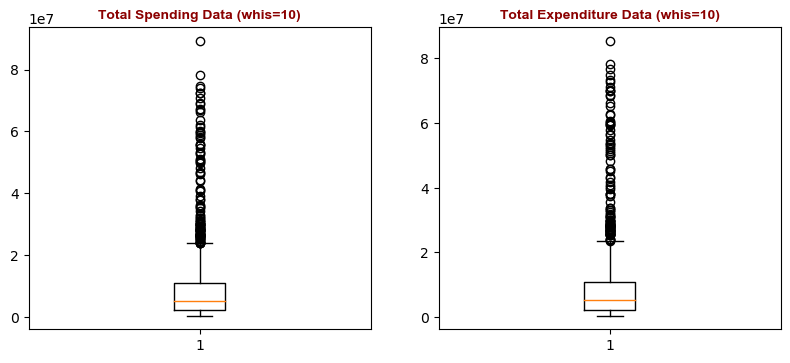

In [49]:
plt.figure(figsize=(15, 4))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 10 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1, 3, 1)
plt.boxplot(states['TOTAL_REVENUE'].dropna())
plt.title("Total Spending Data (whis=10)", fontdict=title_font)


plt.subplot(1, 3, 2)
plt.boxplot(states['TOTAL_EXPENDITURE'].dropna())
plt.title("Total Expenditure Data (whis=10)", fontdict=title_font)

plt.show()


**(2)** If you find outliers in the total income `TOTAL_REVENUE` and total expenditure `TOTAL_EXPENDITURE` variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.

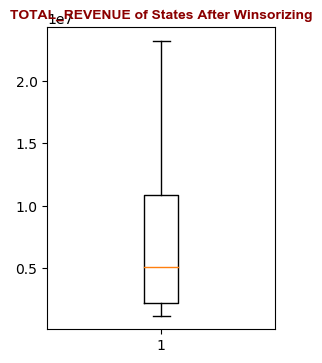

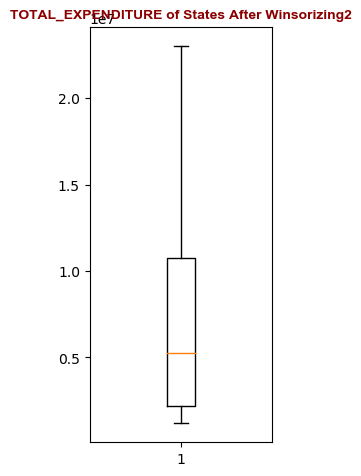

In [55]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
winsorizing= winsorize(np.array(states.TOTAL_REVENUE.dropna()), (0.09, 0.09))
plt.boxplot(winsorizing)
plt.title("TOTAL_REVENUE of States After Winsorizing", fontdict=title_font)
plt.show()
plt.subplot(1, 3, 2)
winsorizing2= winsorize(np.array(states.TOTAL_EXPENDITURE.dropna()), (0.09, 0.09))
plt.boxplot(winsorizing2)
plt.title("TOTAL_EXPENDITURE of States After Winsorizing2", fontdict=title_font)
plt.show()

**(3)** Subtract the total expenditure `TOTAL_EXPENDITURE` from the total income variable `TOTAL_REVENUE` to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

Text(0.5, 1.0, 'Total Data (whis=1.5)')

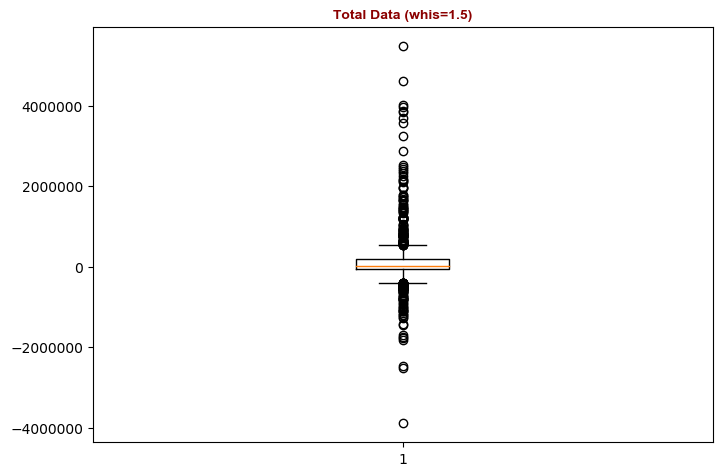

In [46]:
states[['TOTAL_EXPENDITURE','TOTAL_REVENUE']]
states["total"] = (states["TOTAL_EXPENDITURE"] - states["TOTAL_REVENUE"])

plt.boxplot(states['total'].dropna())
plt.title("Total Data (whis=1.5)", fontdict=title_font)

In [31]:
states["total"]

0       -25087.0
1       -77103.0
2       143501.0
3        31063.0
4       878807.0
          ...   
1710         NaN
1711         NaN
1712         NaN
1713         NaN
1714         NaN
Name: total, Length: 1715, dtype: float64

**(4)** Again create a variable that can be considered as a budget deficit by subtracting the total income `TOTAL_REVENUE` variable from the total expenditure `TOTAL_EXPENDITURE`. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

Text(0.5, 1.0, 'Total Data (whis=1.5)')

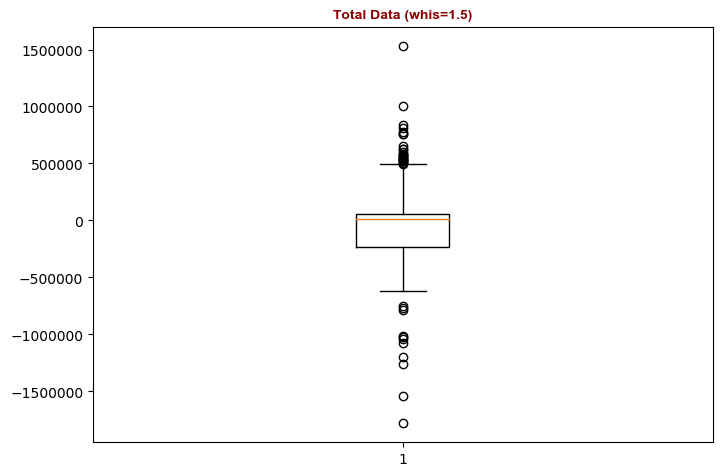

In [56]:
winsorizing= winsorize(np.array(states.TOTAL_REVENUE.dropna()), (0.20, 0.20))
winsorizing2= winsorize(np.array(states.TOTAL_EXPENDITURE.dropna()), (0.20, 0.20))
Total_rev = pd.DataFrame(winsorizing)
Total_exp = pd.DataFrame(winsorizing2)
states["total"] = (Total_exp - Total_rev)

plt.boxplot(states['total'].dropna())
plt.title("Total Data (whis=1.5)", fontdict=title_font)

**(5)** Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

Yes I see the difference between the two. Outlier values decreased after outlier values were modified with winsorizing

**(6)** If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?

The method we use in the fourth question is better because filling outlier data makes the data more reliable and accurate.